请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

# 1.环境准备

In [31]:
#下载PaddleClas

!git clone https://gitee.com/paddlepaddle/PaddleClas.git -b release/2.3

正克隆到 'PaddleClas'...
remote: Enumerating objects: 25293, done.
remote: Counting objects: 100% (5176/5176), done.
remote: Compressing objects: 100% (1840/1840), done.
remote: Total 25293 (delta 3636), reused 4691 (delta 3319), pack-reused 20117
接收对象中: 100% (25293/25293), 155.60 MiB | 8.43 MiB/s, 完成.
处理 delta 中: 100% (17421/17421), 完成.
检查连接... 完成。


In [32]:
#编译PaddleClas 依赖库
%cd PaddleClas/
!pip install --upgrade -r requirements.txt -i https://mirror.baidu.com/pypi/simple

/home/aistudio/PaddleClas
Looking in indexes: https://mirror.baidu.com/pypi/simple


In [33]:
%cd deploy/

/home/aistudio/PaddleClas/deploy


# 2.数据与模型准备

In [34]:
%mkdir models
%cd models
# 下载通用检测 inference 模型并解压
!wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/models/inference/picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar && tar -xf picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar
# 下载识别 inference 模型并解压
!wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/models/inference/general_PPLCNet_x2_5_lite_v1.0_infer.tar && tar -xf general_PPLCNet_x2_5_lite_v1.0_infer.tar

!cd ../
# 下载 demo 数据并解压
!wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/data/drink_dataset_v1.0.tar && tar -xf drink_dataset_v1.0.tar

/home/aistudio/PaddleClas/deploy/models
--2022-04-11 23:47:50--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/models/inference/picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar
正在解析主机 paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
正在连接 paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|182.61.200.229|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 30638080 (29M) [application/x-tar]
正在保存至: “picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar”

picodet_PPLCNet_x2_ 100%[===================>]  29.22M  21.0MB/s    in 1.4s    

2022-04-11 23:47:52 (21.0 MB/s) - 已保存 “picodet_PPLCNet_x2_5_mainbody_lite_v1.0_infer.tar” [30638080/30638080])

--2022-04-11 23:47:53--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/rec/models/inference/general_PPLCNet_x2_5_lite_v1.0_infer.tar
正在解析主机 paddle-imagenet-models-name.bj.bcebos.com (paddle-i

In [35]:
%cd ..

/home/aistudio/PaddleClas/deploy


# 3.建立索引库

In [36]:
# 下面是使用下载的服务端商品识别模型进行索引库构建
!python3.7 python/build_gallery.py -c configs/inference_general.yaml -o Global.rec_inference_model_dir=./models/general_PPLCNet_x2_5_lite_v1.0_infer

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:39: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-0

In [37]:
# 安装faiss索引库
!pip install faiss-cpu==1.7.1post2

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


# 4.识别单张图像

In [38]:
!python3.7 python/predict_system.py -c configs/inference_general.yaml

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:39: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-0

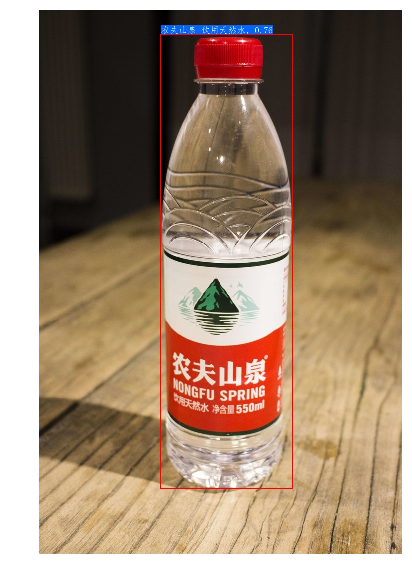

In [47]:
#可视化识别结果
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline
# 预测结果展示
img = mpimg.imread("output/nongfu_spring.jpeg")
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()

# 5.批量识别图像

In [39]:
# 使用下面的命令使用 GPU 进行预测，如果希望使用 CPU 预测，可以在命令后面添加 -o Global.use_gpu=False
!python3.7 python/predict_system.py -c configs/inference_general.yaml -o Global.infer_imgs="./drink_dataset_v1.0/test_images/"

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:39: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-0

# 6.自定义饮料图像识别

In [44]:
!python3.7 python/build_gallery.py -c configs/inference_general.yaml -o IndexProcess.data_file="./drink_dataset_v1.0/gallery/drink_label_all.txt" -o IndexProcess.index_dir="./drink_dataset_v1.0/index_all"

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:39: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-0

In [45]:
# 使用下面的命令使用 GPU 进行预测，如果希望使用 CPU 预测，可以在命令后面添加 -o Global.use_gpu=False
!python3.7 python/predict_system.py -c configs/inference_general.yaml -o Global.infer_imgs="././drink_dataset_v1.0/test_images/mosilian.jpeg" -o IndexProcess.index_dir="./drink_dataset_v1.0/index_all"

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/transforms/functional_pil.py:39: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-0

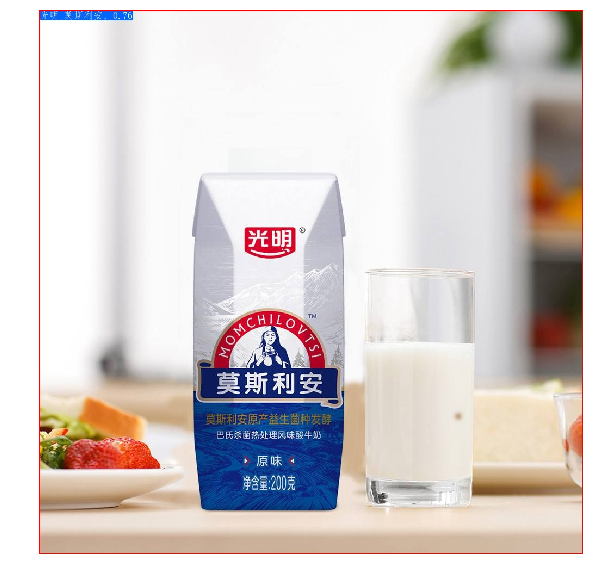

In [46]:
#可视化识别结果
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline
# 预测结果展示
img = mpimg.imread("output/mosilian.jpeg")
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()